In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
%matplotlib inline

In [17]:
def p(freq):
    sr = 32000 # Sample rate global, 32k amostras em 1 segundo
    time = np.linspace(0, 1, sr)
    
    signal = np.sin(2*np.pi*freq*time)
    
    dim = 1*6.4
    plt.figure(figsize=[dim, 0.75*dim])
    plt.plot(time, signal)
    plt.grid()
    return signal

w = widgets.interactive(p, freq=(1, 50, 1))
display(w)

# -------------------------------------------------------------------------------------

def samp(sample_freq):
    
    sr = 32000 # Sample rate global, 32k amostras em 1 segundo
    time = np.linspace(0, 1, sr)
    freq = 10
    dim = 1*6.4
    y = np.sin(2*np.pi*freq*time)
    plt.figure(figsize=[dim, 0.75*dim])
    plt.plot(time, y, 'r:')
    
    #ts = np.arange(0, 1 + 1/sample_freq, 1/sample_freq) # passo = 1/fs 
    ts = np.linspace(0, 1, sample_freq)
    samp_signal = np.sin(2*np.pi*freq*ts)
    plt.stem(ts, samp_signal, linefmt='-C0', markerfmt='o', basefmt='k-')
    
    plt.grid()
    return samp_signal

w2 = widgets.interactive(samp, sample_freq=(1, 55, 1))
display(w2)

interactive(children=(IntSlider(value=25, description='freq', max=50, min=1), Output()), _dom_classes=('widget…

interactive(children=(IntSlider(value=28, description='sample_freq', max=55, min=1), Output()), _dom_classes=(…

In [18]:
signal = w.result
samp_signal = w2.result

## Início do trabalho...

de finir o sinal e plotar é o primeiro passo já que o sinal é imutável...

" tentafiva de implementar tudo com base na interação ???? seria em cas cata pra casa vez que eu mudasse

tratar as variáveis para caso geral com uma só inicialização

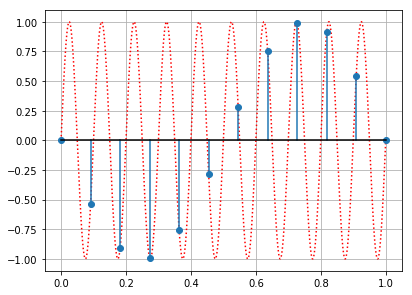

In [8]:
sr = 32000 # Sample rate global, 32k amostras em 1 segundo
time = np.linspace(0, 1, sr)
freq = 10
dim = 1*6.4
y = np.sin(2*np.pi*freq*time)
plt.figure(figsize=[dim, 0.75*dim])
plt.plot(time, y, 'r:')

sampling_freq = 11
t2 = np.arange(0, 1 + 1/sampling_freq, 1/sampling_freq) # passo = 1/fs 
plt.stem(t2, np.sin(2*np.pi*freq*t2), linefmt='-C0', markerfmt='o', basefmt='k-')
plt.grid()
plt.show()

### Reconstruções 


- ordem zero
- interpolar
- ideal


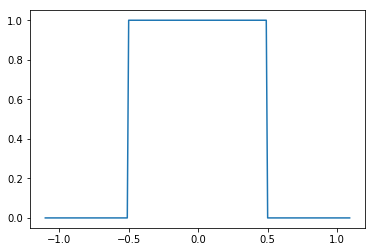

In [11]:
fs = samp_signal.size
Ts = 1/(fs-1)

sr = 32000 # Sample rate global, 32k amostras em 1 segundo, domínio do sinal x_a
time = np.linspace(0, 1, sr)

time.size

def rect(t):
    
    if abs(t) > 0.5:
        return 0
    elif abs(t) < 0.5:
        return 1
    else:
        return 0.5
    
r = np.arange(-1.1, 1.1, 0.01)
q = np.array([rect(x) for x in r])

plt.plot(r,q)

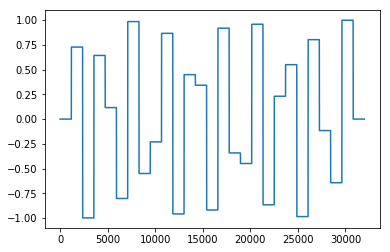

In [13]:
# explicar funcionamento...  https://en.wikipedia.org/wiki/Zero-order_hold

rec_zero_order = np.zeros(sr)
for t in range(len(time)):
    soma = 0
    for n in range(26):
        soma += rect((time[t] - 0.5*Ts - n*Ts)/Ts)*samp_signal[n]
    rec_zero_order[t] = soma


plt.plot(rec_zero_order)


[ 0.00000000e+00  5.87785252e-01 -9.51056516e-01  9.51056516e-01
 -5.87785252e-01 -4.89858720e-16  5.87785252e-01 -9.51056516e-01
  9.51056516e-01 -5.87785252e-01 -9.79717439e-16  5.87785252e-01
 -9.51056516e-01  9.51056516e-01 -5.87785252e-01 -1.46957616e-15
  5.87785252e-01 -9.51056516e-01  9.51056516e-01 -5.87785252e-01
 -1.95943488e-15  5.87785252e-01 -9.51056516e-01  9.51056516e-01
 -5.87785252e-01 -2.44929360e-15]
[ 0.00000000e+00  4.59221579e-04  9.18443158e-04 ... -9.18443158e-04
 -4.59221579e-04 -2.44929360e-15]


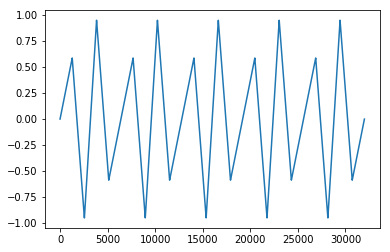

In [16]:
# explicar funcionamento...  http://fourier.eng.hmc.edu/e101/lectures/Sampling_theorem/node3.html

# rec_lin = np.zeros(sr)
# for t in range(len(time)):
#     soma = 0
#     for n in range(26):
#         soma += tri((time[t]))*samp_signal[n]
#     rec_lin[t] = soma


# plt.plot(rec_lin)
print(samp_signal )
ts = np.linspace(0,1,26) #   !!!!!
rec_lin = np.zeros(32000)
time = np.linspace(0, 1, 32000)

# for t in range(32000):
#     for i in range(len(samp_signal)-1):
#         if time[t] > ts[i] and time[t] < ts[i+1]:
#             rec_lin[t] = samp_signal[i] + (time[t] - ts[i])*(samp_signal[i+1] - samp_signal[i])/(ts[i+1] - ts[i])

rec_lin = np.interp(time, ts, samp_signal)

print(rec_lin)
plt.plot(rec_lin)

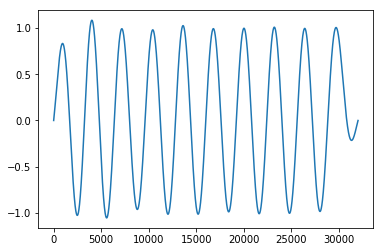

In [12]:
rec_ideal = np.zeros(sr)
for t in range(len(time)):
    soma = 0
    for n in range(26):
        soma += np.sinc((time[t]  - n*Ts)/Ts)*samp_signal[n]
    rec_ideal[t] = soma


plt.plot(rec_ideal)

In [ ]:
# TODO: Organizar e tratar erro fazer plots 


# erro = original - rec
# plot
# np.mean(abs(erro))

# linspace anda 10 deltas e amostra 11 vezes
# arange anda 11 deltas amostra 12 vezes
# n = 26
# print(np.arange(0, 1+1/n, 1/n)) 
# np.linspace(0, 1, n)

# import IPython.display as ipd

# ipd.Audio(0.001*np.sin(2*np.pi*10*time), rate=32000)
